In [152]:
#The HR Analytics dateset from kaggle competitions 
#Import of  necessary libraries, Modules and classifiers
import numpy as np  #fundamental package for scientific computing with Python
import pandas as pd #package providing fast, flexible, and expressive data structures
import statsmodels.api as sm # import statsmodels 
import matplotlib.pyplot as plt #library for plotting 2dimensional graphs

from sklearn import linear_model #load the packages for using a linear regression model
from sklearn.metrics import mean_absolute_error #module for calculating Mean Absolute Error
from sklearn.metrics import mean_squared_error #module for calculating Mean Saquared Error
from sklearn import metrics #for calculating metrics
from time import time #provides various time-related functions
from sklearn.model_selection import train_test_split #utility function to split the data into a 
#development set used for fitting a GridSearchCV instance and an evaluation set for its final evaluation

In [153]:
hr_data=pd.read_csv('.\HR_comma_sep.csv',header=0) #read the data from a csv-file; ensure that the  
#values are separated by commas otherwise you need to specify the delimiter explicitly within the load-statement

hr_data.head() #show the first five entries; attribute in brackets will give the # of printed lines 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [154]:
hr_data_new = pd.get_dummies(hr_data, ['department', 'salary'] ,drop_first = True) #Whether to get k-1 
#dummies out of k categorical levels by removing the first level. New in Pandas version 0.18.0.

In [155]:
#separate X (feature-variables) and y (target-variable)
X = hr_data_new.drop('satisfaction_level', axis=1) #Drop the target-variable from the features  
y = hr_data_new['satisfaction_level']  #set it to y

#split the data set into train and test set; proportion of test size = 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
#using the same random_state (fixed seed ) will always produce the same result

In [156]:
# instantiate the model; standard linear regression approach
lr = linear_model.LinearRegression(normalize=True, ) #regressors are normalized, note that this 
#makes the hyperparameters learnt more robust and almost independent from the number of samples

t0=time() #we use time() functionality to see how long training of the classifier will take
#fit the model to the data
linreg=lr.fit(X_train,y_train)

print("normal linear Regression took\n training time: ", round(time()-t0,3), "s")  #We print the 
#training time, that is equal to the processing time of the cell.

normal linear Regression took
 training time:  0.027 s


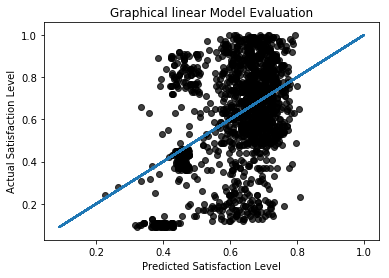

In [157]:
#plot predicted vs. test values - shows the quality of the model visually
y_pred = lr.predict(X_test) #Predict labels based on the testing features

plt.title('Graphical linear Model Evaluation') #printing the titel of the plot
plt.xlabel('Predicted Satisfaction Level') #naming the x-axis of the plot
plt.ylabel('Actual Satisfaction Level') #naming the y-axis  of the plot

actual_values = y_test
plt.scatter(y_pred, actual_values,alpha=.75, color='black')  #plots the predicted values
#against the testing values
plt.plot(y_test,y_test,linewidth=2.0) #draws a lineplot symbolizing the angle bisectrix 

plt.show()

In [166]:
#regression metrics for linear regression model
ae=mean_absolute_error(y_test, y_pred) #calculating the the Mean Absolute Error betw. train- and test-set
print ('absolute error is: \n', ae)

#Mean squared Error, Compared to Mean Absolute Error, RMSE amplifies and severely punishes large errors
print ('RMSE is: \n', mean_squared_error(y_test, y_pred))

absolute error is: 
 0.178341413421
RMSE is: 
 0.0496778356633


In [159]:
#print the intercept and coefficients of the model
print(linreg.intercept_)
print(lr.coef_)

0.617471814574
[  2.41537082e-01  -4.07147700e-02   1.94566343e-04  -4.51634149e-03
   1.38237345e-03  -2.26086694e-01   2.81970714e-03  -1.38231668e-02
  -2.43199266e-02  -6.94839692e-03  -3.16897064e-03  -4.77138296e-03
   3.40702101e-03   1.37541831e-03   1.84608730e-03  -6.93563248e-04
   1.03726806e-02   1.25802755e-02]


In [160]:
#Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

#Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     satisfaction_level   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     5577.
Date:                Mon, 13 Nov 2017   Prob (F-statistic):               0.00
Time:                        14:11:24   Log-Likelihood:                 228.51
No. Observations:               14999   AIC:                            -421.0
Df Residuals:                   14981   BIC:                            -283.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
last_evaluation            0.4367      0.012     37.250      0.000       0.414       0.460
number_project            -0.0343      0.002    -18.963      0.000      -0.038      -0.031
average_montly_hours       0.0008   4.19e-05     19.237      0.000       0.001       0.001
time_spend_company         0.0079      0.001      5.826      0.000       0.005       0.011
Work_accident              0.0133      0.006      2.380      0.017       0.002       0.024
left                      -0.2320      0.005    -48.633      0.000      -0.241      -0.223
promotion_last_5years      0.0206      0.014      1.497      0.135      -0.006       0.047
department_RandD           0.1334      0.010     12.844      0.000       0.113       0.154
department_accounting      0.1229      0.010     11.763      0.000       0.102       0.143
department_hr              0.1410      0.011     13.330      0.000       0.120       0.162
department_management      0.1660      0.011     14.659      0.000       0.144       0.188
department_marketing       0.1480      0.010     14.681      0.000       0.128       0.168
department_product_mng     0.1482      0.010     14.961      0.000       0.129       0.168
department_sales           0.1468      0.007     20.912      0.000       0.133       0.161
department_support         0.1477      0.008     18.895      0.000       0.132       0.163
department_technical       0.1428      0.008     19.003      0.000       0.128       0.158
salary_low                 0.1629      0.007     24.113      0.000       0.150       0.176
salary_medium              0.1613      0.007     23.823      0.000       0.148       0.175
==============================================================================
Omnibus:                      464.829   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              481.657
Skew:                          -0.417   Prob(JB):                    2.57e-105
Kurtosis:                       2.727   Cond. No.                     2.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [161]:
#instantiate the model with the LARS; 
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lars.html
lr = linear_model.Lars(fit_intercept=True, verbose=False, normalize=True, 
                       n_nonzero_coefs=18, fit_path=True, positive=False) 

t0=time() #we use time() functionality to see how long training of the classifier will take
#fit the model to the data
linreg=lr.fit(X_train,y_train) #Now we  instantiate the LARS-Model.

print("Least Angle Regression took\n training time: ", round(time()-t0,3), "s")  #We print the training time, 
#that is equal to the processing time of the cell.

Least Angle Regression took
 training time:  0.012 s


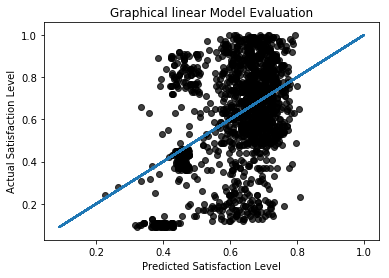

In [162]:
#plot predicted vs. test values - shows the quality of the model visually
y_pred = lr.predict(X_test) #Predict labels based on the testing features

plt.title('Graphical linear Model Evaluation') #printing the titel of the plot
plt.xlabel('Predicted Satisfaction Level') #naming the x-axis of the plot
plt.ylabel('Actual Satisfaction Level') #naming the y-axis  of the plot

actual_values = y_test
plt.scatter(y_pred, actual_values,alpha=.75, color='black')  #plots the predicted values
#against the testing values
plt.plot(y_test,y_test,linewidth=2.0) #draws a lineplot symbolizing the angle bisectrix 

plt.show()

In [163]:
#regression metrics for the LARS

ae=mean_absolute_error(y_test, y_pred) #calculating the the Mean Absolute Error betw. train- and test-set
print ('absolute error is: \n', ae)

#Mean squared Error, Compared to Mean Absolute Error, RMSE amplifies and severely punishes large errors
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_pred))

absolute error is: 
 0.178341413421
RMSE is: 
 0.0496778356633


In [164]:
#print the intercept and coefficients of the model
print(linreg.intercept_)
print(lr.coef_)

0.617471814574
[  2.41537082e-01  -4.07147700e-02   1.94566343e-04  -4.51634149e-03
   1.38237345e-03  -2.26086694e-01   2.81970714e-03  -1.38231668e-02
  -2.43199266e-02  -6.94839692e-03  -3.16897064e-03  -4.77138296e-03
   3.40702101e-03   1.37541831e-03   1.84608730e-03  -6.93563248e-04
   1.03726806e-02   1.25802755e-02]
